In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('heart-2020-cleaned-numerical.csv') #data with feature 
df.head(3)
# len(df.index)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,AmericanIndian/AlaskanNative,Diabetic,DiabeticWhilePregnant,BorderlineDiabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,1,0,0,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,1,0,0,1,2,8.0,1,0,0


# balancing data

In [3]:

df_HD = df.loc[df['HeartDisease'] == 1]
df_NHD = df.loc[df['HeartDisease'] == 0]
#get equal amount of sample of each
df_HD = df_HD.sample(27373)
df_NHD = df_NHD.sample(27373)
# merge the two types
df = pd.concat([df_HD, df_NHD], axis=0)

# split data into training & testing data

In [4]:
# set up training data
X = df.loc[:, df.columns != 'HeartDisease']
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('training size: ', len(X_train), len(y_train))
print('test size: ', len(X_test), len(y_test))

training size:  43796 43796
test size:  10950 10950


# Best single model

In [5]:
# initial LR
lr_model = LogisticRegression(solver='liblinear', C=10) #add parameters 
lr_cv_results = cross_validate(lr_model, X_train, y_train, cv=5, scoring='f1') 
print('Simple Logistic Regression Results:', lr_cv_results['test_score'].mean())


Simple Logistic Regression Results: 0.7671058425638686


# trying LR model with adaBooster

In [8]:
adaclf = AdaBoostClassifier(base_estimator=lr_model)
cv_results = cross_validate(adaclf, X_train, y_train, cv=5)
print('ada booster test score: ', cv_results['test_score'].mean())

ada booster test score:  0.7633802153140854


In [9]:
# tuning adabooster
parameters = {'learning_rate':[1, 1.2, 1.4, 1.6, 1.8]}
adaclf = AdaBoostClassifier(base_estimator=lr_model)
adaclfgs = GridSearchCV(adaclf, parameters,cv=5, scoring='f1')#liblinear allow l1 panelty as well
adaclfgs.fit(X_train,y_train)
print("best params: ", adaclfgs.best_params_)
print('score on testing test: ', adaclfgs.score(X_test, y_test)) #gives .86

best params:  {'learning_rate': 1.8}
score on testing test:  0.7713069468345258


In [20]:
# tuning adabooster
adaclf2 = AdaBoostClassifier(base_estimator=lr_model, learning_rate=1.8)
adaclf2.fit(X_train, y_train)
adaclf2.predict(X_test)
print("ada boosting score: ", adaclf2.score(X_test, y_test))

ada boosting score:  0.7672146118721461


In [17]:
# tuning adabooster
adaclf3 = AdaBoostClassifier(base_estimator=lr_model, n_estimators=150,learning_rate=1.8)
adaclf3 = adaclf3.fit(X_train, y_train)
y_pred = adaclf3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))
print('roc:', metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.7679452054794521
f1: 0.7709366267015235
roc: 0.7680559245269699


## trying LR model with Voting Classifier

In [21]:
vtgclf = VotingClassifier(estimators=[('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model), ('lr4', lr_model), ('lr5', lr_model), ('lr6', lr_model), ('lr7', lr_model), ('lr8', lr_model), ('lr9', lr_model), ('lr10', lr_model), ('lr11', lr_model), ('lr12', lr_model), ('lr13', lr_model), ('lr14', lr_model), ('lr15', lr_model), ('lr16', lr_model), ('lr17', lr_model), ('lr18', lr_model), ('lr19', lr_model), ('lr20', lr_model), ('lr21', lr_model)], voting='hard')
cv_results = cross_validate(vtgclf, X_train, y_train, cv=5)
print('voting hard test score: ', cv_results['test_score'].mean())

voting hard test score:  0.7650013788817869


In [15]:
vtgclf = VotingClassifier(estimators=[('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model)], voting='soft' )
cv_results = cross_validate(vtgclf, X_train, y_train, cv=5,  scoring='roc_auc')
print('voting soft test score: ', cv_results['test_score'].mean())

voting soft test score:  0.842260852405229


In [12]:
vtgclf2 = VotingClassifier(estimators=[('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model), ('lr4', lr_model), ('lr5', lr_model), ('lr6', lr_model), ('lr7', lr_model), ('lr8', lr_model), ('lr9', lr_model), ('lr10', lr_model), ('lr11', lr_model), ('lr12', lr_model), ('lr13', lr_model), ('lr14', lr_model), ('lr15', lr_model), ('lr16', lr_model), ('lr17', lr_model), ('lr18', lr_model), ('lr19', lr_model), ('lr20', lr_model), ('lr21', lr_model)], voting='soft')
cv_results = cross_validate(vtgclf2, X_train, y_train, cv=5,  scoring='roc_auc')
print('voting soft test score: ', cv_results['test_score'].mean())

voting soft test score:  0.8414712774868238


In [13]:
# trying clustering

for x in range(1,10):
    kmeans = KMeans(n_clusters=x).fit(X_train)
    y_pred = kmeans.predict(X_test)
    print("kmeans score: ", metrics.accuracy_score(y_test, y_pred))
    

kmeans score:  0.5031050228310502
kmeans score:  0.411324200913242
kmeans score:  0.485296803652968
kmeans score:  0.1749771689497717
kmeans score:  0.38794520547945205
kmeans score:  0.20191780821917807
kmeans score:  0.22812785388127854
kmeans score:  0.1678538812785388
kmeans score:  0.049406392694063925


## trying LR model with stacking classifier

In [19]:
#stacking
estimators = [('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model), ('lr4', lr_model), ('lr5', lr_model), ('lr6', lr_model), ('lr7', lr_model), ('lr8', lr_model), ('lr9', lr_model), ('lr10', lr_model), ('lr11', lr_model), ('lr12', lr_model), ('lr13', lr_model), ('lr14', lr_model), ('lr15', lr_model), ('lr16', lr_model), ('lr17', lr_model), ('lr18', lr_model), ('lr19', lr_model), ('lr20', lr_model), ('lr21', lr_model)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)
y_pred = clf.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred))
print('roc:', metrics.roc_auc_score(y_test, y_pred))

f1: 0.7709889318815801
roc: 0.7677019566218171


trying LR model with bagging classifier

In [25]:
# bagging
clf = BaggingClassifier(base_estimator=lr_model, n_estimators=100, random_state=0, max_features=20)
clf.fit(X_train, y_train).score(X_test, y_test)
y_pred = clf.predict(X_test)
print('f1:', metrics.f1_score(y_test, y_pred))
print('roc:', metrics.roc_auc_score(y_test, y_pred))

f1: 0.7701583873290136
roc: 0.7668794399660591


In [47]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7445662100456621

In [52]:
# roc for ada
parameters = {'learning_rate':[1, 1.2, 1.4, 1.6, 1.8]}
adaclf = AdaBoostClassifier(base_estimator=lr_model)
adaclfgs = GridSearchCV(adaclf, parameters,cv=5, scoring='roc_auc')#liblinear allow l1 panelty as well
adaclfgs.fit(X_train,y_train)
print("best params: ", adaclfgs.best_params_)
print('score on testing test: ', adaclfgs.score(X_test, y_test)) #gives .86

best params:  {'learning_rate': 1}
score on testing test:  0.8439799717552962


In [ ]:
printing roc_auc & f1 scores for 4 ensemble methods

In [28]:
# bagging
clf = BaggingClassifier(base_estimator=lr_model, n_estimators=100, random_state=0, max_features=20)
cv_results = cross_validate(clf, X_train, y_train, cv=5,  scoring='roc_auc')
print('bagging rc: ', cv_results['test_score'].mean())
f1bag = cv_results['test_score'].mean()
cv_results = cross_validate(clf, X_train, y_train, cv=5,  scoring='f1')
print('bagging f1: ', cv_results['test_score'].mean())
rocbag= cv_results['test_score'].mean()

#stacking
estimators = [('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model), ('lr4', lr_model), ('lr5', lr_model), ('lr6', lr_model), ('lr7', lr_model), ('lr8', lr_model), ('lr9', lr_model), ('lr10', lr_model), ('lr11', lr_model), ('lr12', lr_model), ('lr13', lr_model), ('lr14', lr_model), ('lr15', lr_model), ('lr16', lr_model), ('lr17', lr_model), ('lr18', lr_model), ('lr19', lr_model), ('lr20', lr_model), ('lr21', lr_model)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
cv_results = cross_validate(clf, X_train, y_train, cv=5,  scoring='roc_auc')
print('stacking rc: ', cv_results['test_score'].mean())
f1stack = cv_results['test_score'].mean()
cv_results = cross_validate(clf, X_train, y_train, cv=5,  scoring='f1')
print('stacking f1: ', cv_results['test_score'].mean())
rocstack= cv_results['test_score'].mean()

#ada
adaclf3 = AdaBoostClassifier(base_estimator=lr_model, n_estimators=150,learning_rate=1.8)
cv_results = cross_validate(adaclf3, X_train, y_train, cv=5,  scoring='roc_auc')
print('ada rc: ', cv_results['test_score'].mean())
f1ada = cv_results['test_score'].mean()
cv_results = cross_validate(adaclf3, X_train, y_train, cv=5,  scoring='f1')
print('ada f1: ', cv_results['test_score'].mean())
rocada= cv_results['test_score'].mean()

#voting
vtgclf2 = VotingClassifier(estimators=[('lr', lr_model), ('lr2', lr_model), ('lr3', lr_model), ('lr4', lr_model), ('lr5', lr_model), ('lr6', lr_model), ('lr7', lr_model), ('lr8', lr_model), ('lr9', lr_model), ('lr10', lr_model), ('lr11', lr_model), ('lr12', lr_model), ('lr13', lr_model), ('lr14', lr_model), ('lr15', lr_model), ('lr16', lr_model), ('lr17', lr_model), ('lr18', lr_model), ('lr19', lr_model), ('lr20', lr_model), ('lr21', lr_model)], voting='soft')
cv_results = cross_validate(vtgclf2, X_train, y_train, cv=5,  scoring='roc_auc')
print('voting rc: ', cv_results['test_score'].mean())
f1vtg = cv_results['test_score'].mean()
cv_results = cross_validate(vtgclf2, X_train, y_train, cv=5,  scoring='f1')
print('voting f1: ', cv_results['test_score'].mean())
rocvtg= cv_results['test_score'].mean()


bagging rc:  0.8413126701547636
bagging f1:  0.7652334727807286
stacking rc:  0.8414712774868238
stacking f1:  0.7662632502624483
ada rc:  0.8412065947671803
ada f1:  0.7655240746563294
voting rc:  0.8414712774868238
voting f1:  0.7671058425638686


## graphing the above results

In [30]:
xaxis = ['bagging', 'stacking', 'adaBooster', 'voting']
f1scores = [f1bag,f1stack,f1ada, f1vtg]
rocscores = [rocbag, rocstack, rocada, rocvtg]
print(xaxis, f1scores, rocscores)

['bagging', 'stacking', 'adaBooster', 'voting'] [0.8413126701547636, 0.8414712774868238, 0.8412065947671803, 0.8414712774868238] [0.7652334727807286, 0.7662632502624483, 0.7655240746563294, 0.7671058425638686]


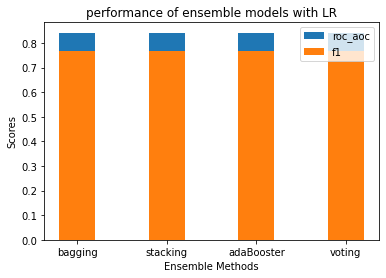

In [42]:
plt.bar(xaxis, f1scores, 0.4, label = 'roc_aoc')
plt.bar(xaxis, rocscores, 0.4, label = 'f1')

plt.xlabel("Ensemble Methods")
plt.ylabel("Scores")
plt.title("performance of ensemble models with LR")
plt.legend()
plt.show()